In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
filename = 'line-chart-apple.png'
image = Image.open(filename)
image_px = np.array(image)

In [4]:
def show_images(images_px, shape):
    fig = plt.figure(figsize=(8, 8))
    for i, image_px in enumerate(images_px):
        fig.add_subplot(shape[0], shape[1], i + 1)
        plt.imshow(Image.fromarray(image_px))
    plt.show()
    
def show_image(image_px):
    show_images([image_px], (1, 1))

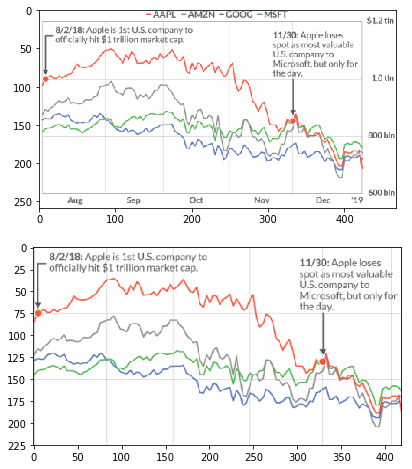

In [5]:
cropped_image_px = image_px[15:240,3:422]
show_images([image_px, cropped_image_px], (2, 1))

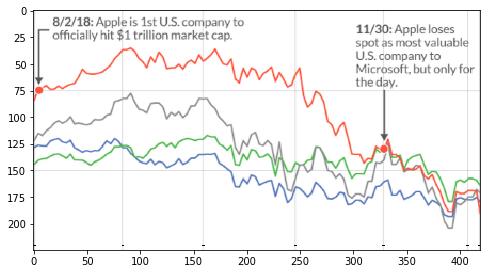

(array([  0,   1,   2,  83,  84, 158, 159, 160, 245, 246, 327, 328, 329,
       406, 407, 408, 417, 418], dtype=int64),)


In [6]:
test = np.copy(cropped_image_px)
diff = np.linalg.norm([255, 255, 255] - test[220,:,:3], axis=1)
grid_candidates = np.where(diff > 0)
test[220, grid_candidates, :3] = 0
show_image(test)
print(grid_candidates)

In [7]:
a = [1, 83, 159, 245, 328, 407]
days = [31, 30, 31, 30, 31]

In [8]:
print(grid_candidates)
print([2.67 * sum(days[:i]) for i in range(6)])

(array([  0,   1,   2,  83,  84, 158, 159, 160, 245, 246, 327, 328, 329,
       406, 407, 408, 417, 418], dtype=int64),)
[0.0, 82.77, 162.87, 245.64, 325.74, 408.51]


In [9]:
days = [31, 30, 31, 30, 31, 4]
days_offset = range(sum(days))
pixels = [int(2.67 * day_offset) for day_offset in days_offset]
points = list(zip(days_offset, pixels))

In [10]:
column_index = 240

test = np.copy(cropped_image_px)
diff = np.linalg.norm([255, 255, 255] - test[:, column_index, :3], axis=1)
test[np.where(diff > 50), column_index, :3]

array([[[180, 180, 180],
        [254, 126, 109],
        [252, 102,  82],
        [197, 213, 197],
        [101, 193, 100],
        [180, 225, 180],
        [179, 179, 179],
        [157, 156, 156],
        [183, 197, 225],
        [ 98, 128, 190],
        [137, 160, 207]]], dtype=uint8)

In [11]:
colors = [
    ([254, 126, 109], 'red'),
    ([252, 102,  82], 'red'),
    ([197, 213, 197], 'green'),
    ([101, 193, 100], 'green'),
    ([180, 225, 180], 'green'),
    ([179, 179, 179], 'gray'),
    ([157, 156, 156], 'gray'),
    ([183, 197, 225], 'blue'),
    ([ 98, 128, 190], 'blue'),
    ([137, 160, 207], 'blue'),
]

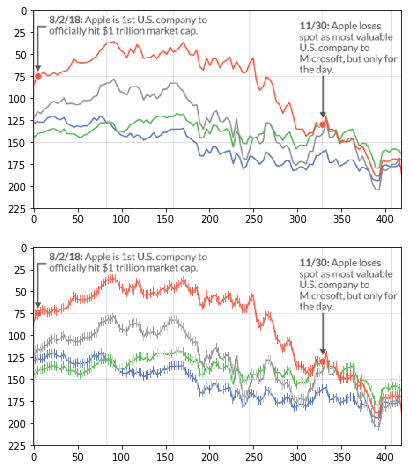

In [12]:
from collections import defaultdict

test = np.copy(cropped_image_px)
data = []
for day_offset, pixel in points:
    column = test[:, pixel, :3]
    nearest = defaultdict(lambda: { 'dist': 9999999 })
    for rgb, color in colors:
        distances = np.linalg.norm(column - rgb, axis=1)
        if color != 'red':
            distances[:75] = 9999999
        index = np.argmin(distances)
        rgb_there = column[index]
        dist_there = distances[index]
        if nearest[color]['dist'] > dist_there:
            nearest[color]['dist'] = dist_there
            nearest[color]['index'] = index
            nearest[color]['rgb'] = rgb_there
    data.append({'day': day_offset})
    for color in ['red', 'green', 'gray', 'blue']:
        index = nearest[color]['index']
        test[index-5:index+5, pixel, :3] = nearest[color]['rgb']
        data[-1][color] = index
    
show_images([cropped_image_px, test], (2,1))

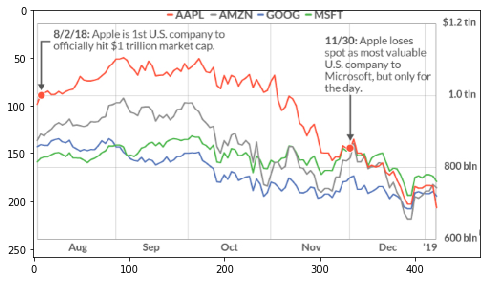

600.0
933.3333333333333
1200.0


In [13]:
show_image(image_px)
def scale(x):
    return 600 + 600 * (225 - x) / 225

print(scale(225))
print(scale(100))
print(scale(0))

In [14]:
import datetime

def offset_to_formatted_date(day_offset):
    date = datetime.datetime(2018, 8, 1) + datetime.timedelta(days=day_offset)
    format_str = "%b %d"
    return date.strftime(format_str)

offset_to_formatted_date(1)

'Aug 02'

In [35]:
transformed = [{
    'day': offset_to_formatted_date(point['day']),
    'AAPL': scale(point['red']),
    'AMZN': scale(point['gray']),
    'GOOG': scale(point['blue']),
    'MSFT': scale(point['green'])
} for point in data]

transformed[0]['AMZN'] = 873

transformed[27]['MSFT'] = 840

transformed[36]['MSFT'] = 850

transformed[54]['MSFT'] = 873
transformed[57]['MSFT'] = 880
transformed[60]['MSFT'] = 888
transformed[63]['MSFT'] = 873

transformed[123]['MSFT'] = 853

transformed[156]['GOOG'] = 761
transformed[156]['AAPL'] = 690

print(transformed[5])

{'day': 'Aug 06', 'AAPL': 1008.0, 'AMZN': 901.3333333333333, 'GOOG': 864.0, 'MSFT': 832.0}


In [36]:
import csv
with open('result.csv', 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=list(transformed[0].keys()))
    writer.writeheader()
    for row in transformed[::3]:
        writer.writerow(row)

In [18]:
transformed = []
for point in data:
    for color, name in [('red', 'AAPL'), ('gray', 'AMZN'), ('blue', 'GOOG'), ('green', 'MSFT')]:
        transformed.append({
            'day': point['day'],
            'company': name,
            'profit': scale(point[color])
        })


In [37]:
import datetime
(datetime.datetime(2018, 8, 1) + datetime.timedelta(days=1)).strftime("%b %d")

'Aug 02'